In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import scipy

In [2]:
experiment = "CA1_clust4-60_AP"
setting = "na_true_noise1"

prob_all = np.load("/media/hdd01/sklee/"+experiment+"/"+setting+"/gru_l20_h40_0.2ms_test.npy").flatten()
spk = np.load("/media/hdd01/sklee/"+experiment+"/data/spike_train_0.2ms.npy")[980*50000:].flatten()
prec_all, rec_all, thresh_list = precision_recall_curve(spk, prob_all)
#thresh_list = thresh_list[np.arange(0,thresh_list.shape[0],5)]

ms_list = [1,2,5,10]
pr_array = np.empty((4,thresh_list.shape[0],2))

for n in tnrange(4):
    bin_size = ms_list[n] * 5
    
    for i in tnrange(thresh_list.shape[0]):
        thresh = thresh_list[i]
        prob_new = np.copy(prob_all)
        prob_new[prob_all<thresh] = 0
        prob_new[prob_all>=thresh] = 1
        
        prob_bin = scipy.ndimage.convolve1d(prob_new.reshape(20,50000), np.ones((bin_size)), 1)
        prob_bin = prob_bin[:,bin_size-1:-bin_size+1]
        prob_bin[prob_bin>0] = 1
        spk_bin = scipy.ndimage.convolve1d(spk.reshape(20,50000), np.ones((bin_size)), 1)
        spk_bin = spk_bin[:,bin_size-1:-bin_size+1]
        spk_bin[spk_bin>0] = 1
        
        tp = np.where((prob_bin == 1) & (spk_bin == 1))[0].size
        fp = np.where((prob_bin == 1) & (spk_bin == 0))[0].size
        tn = np.where((prob_bin == 0) & (spk_bin == 0))[0].size
        fn = np.where((prob_bin == 0) & (spk_bin == 1))[0].size
        
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        pr_array[n,i,0] = prec
        pr_array[n,i,1] = rec

<ipython-input-2-7d4bee58cb4e>:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for n in tnrange(4):


  0%|          | 0/4 [00:00<?, ?it/s]

<ipython-input-2-7d4bee58cb4e>:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(thresh_list.shape[0]):


  0%|          | 0/65147 [00:00<?, ?it/s]

  0%|          | 0/65147 [00:00<?, ?it/s]

  0%|          | 0/65147 [00:00<?, ?it/s]

  0%|          | 0/65147 [00:00<?, ?it/s]

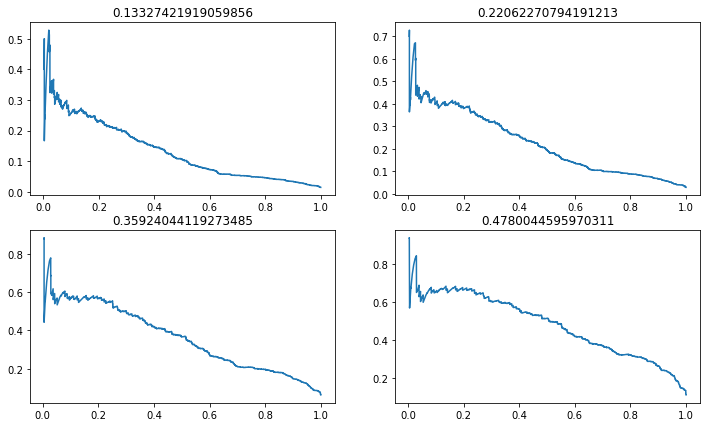

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
for row in range(2):
    for col in range(2):
        idx = row*2+col
        axs[row,col].plot(pr_array[idx,:,1],pr_array[idx,:,0])
        axs[row,col].set_title(str(metrics.auc(pr_array[idx,:,1],pr_array[idx,:,0])))

In [4]:
np.save("/media/hdd01/sklee/"+experiment+"/"+setting+"/prec_rec_"+setting+".npy", pr_array)

In [5]:
auc_array = np.zeros((4,14))

experiment = "CA1_clust4-60_AP"

ap_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/ap_true/prec_rec_ap_true.npy")
na_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true/prec_rec_na_true.npy")
comb_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred/prec_rec_comb_pred.npy")
whole_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/whole_pred/prec_rec_whole_pred.npy")
nona_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/nona_true/prec_rec_nona_true.npy")
nona_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/nona_pred/prec_rec_nona_pred.npy")
diff_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/diff_true/prec_rec_diff_true.npy")
diff_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/diff_pred/prec_rec_diff_pred.npy")
na_true_nona_pred_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_nona_pred/prec_rec_na_true_nona_pred.npy")
na_pred_nona_true_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_pred_nona_true/prec_rec_na_pred_nona_true.npy")
na_true_late_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_late/prec_rec_na_true_late.npy")
comb_pred_late_pr = np.load("/media/hdd01/sklee/"+experiment+"/comb_pred_late/prec_rec_comb_pred_late.npy")
na_true_noise1_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_noise1/prec_rec_na_true_noise1.npy")
na_true_noise3_pr = np.load("/media/hdd01/sklee/"+experiment+"/na_true_noise3/prec_rec_na_true_noise3.npy")

for i in tnrange(4):
    prarea_ap_true = metrics.auc(ap_true_pr[i,:,1], ap_true_pr[i,:,0])
    prarea_na_true = metrics.auc(na_true_pr[i,:,1], na_true_pr[i,:,0])
    prarea_comb_pred = metrics.auc(comb_pred_pr[i,:,1], comb_pred_pr[i,:,0])
    prarea_whole_pred = metrics.auc(whole_pred_pr[i,:,1], whole_pred_pr[i,:,0])
    prarea_nona_true = metrics.auc(nona_true_pr[i,:,1], nona_true_pr[i,:,0])
    prarea_nona_pred = metrics.auc(nona_pred_pr[i,:,1], nona_pred_pr[i,:,0])
    prarea_diff_true = metrics.auc(diff_true_pr[i,:,1], diff_true_pr[i,:,0])
    prarea_diff_pred = metrics.auc(diff_pred_pr[i,:,1], diff_pred_pr[i,:,0])
    prarea_na_true_nona_pred = metrics.auc(na_true_nona_pred_pr[i,:,1], na_true_nona_pred_pr[i,:,0])
    prarea_na_pred_nona_true = metrics.auc(na_pred_nona_true_pr[i,:,1], na_pred_nona_true_pr[i,:,0])
    prarea_na_true_late = metrics.auc(na_true_late_pr[i,:,1], na_true_late_pr[i,:,0])
    prarea_comb_pred_late = metrics.auc(comb_pred_late_pr[i,:,1], comb_pred_late_pr[i,:,0])
    prarea_na_true_noise1 = metrics.auc(na_true_noise1_pr[i,:,1], na_true_noise1_pr[i,:,0])
    prarea_na_true_noise3 = metrics.auc(na_true_noise3_pr[i,:,1], na_true_noise3_pr[i,:,0])
    
    auc_array[i,0] = prarea_ap_true
    auc_array[i,1] = prarea_na_true
    auc_array[i,2] = prarea_comb_pred
    auc_array[i,3] = prarea_whole_pred
    auc_array[i,4] = prarea_nona_true
    auc_array[i,5] = prarea_nona_pred
    auc_array[i,6] = prarea_diff_true
    auc_array[i,7] = prarea_diff_pred
    auc_array[i,8] = prarea_na_true_nona_pred
    auc_array[i,9] = prarea_na_pred_nona_true
    auc_array[i,10] = prarea_na_true_late
    auc_array[i,11] = prarea_comb_pred_late
    auc_array[i,12] = prarea_na_true_noise1
    auc_array[i,13] = prarea_na_true_noise3
    

<ipython-input-5-538bb40e1d94>:20: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(4):


  0%|          | 0/4 [00:00<?, ?it/s]

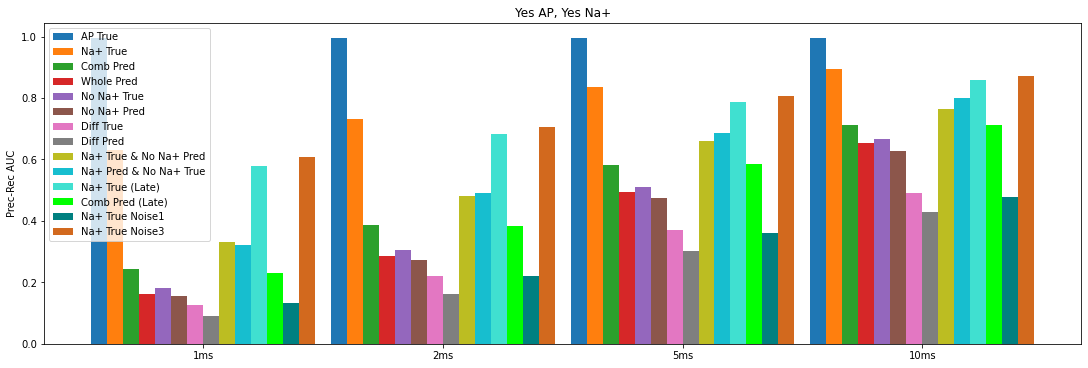

In [8]:
fig = plt.figure(constrained_layout=True, figsize = (15,5))
gs = fig.add_gridspec(1,1, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])

colors = ["tab:blue","tab:orange","tab:green",
         "tab:red","tab:purple","tab:brown","tab:pink","tab:gray",
         "tab:olive","tab:cyan","turquoise","lime", "teal", "chocolate", "deeppink"]

width = 1
ap_true_bar = ax.bar(np.arange(0,15*4,15), auc_array[:,0], width, label='AP True', color=colors[0])
na_true_bar = ax.bar(np.arange(1,15*4+1,15), auc_array[:,1], width, label='Na+ True', color=colors[1])
na_true_bar = ax.bar(np.arange(2,15*4+2,15), auc_array[:,2], width, label='Comb Pred', color=colors[2])
na_true_bar = ax.bar(np.arange(3,15*4+3,15), auc_array[:,3], width, label='Whole Pred', color=colors[3])
na_true_bar = ax.bar(np.arange(4,15*4+4,15), auc_array[:,4], width, label='No Na+ True', color=colors[4])
na_true_bar = ax.bar(np.arange(5,15*4+5,15), auc_array[:,5], width, label='No Na+ Pred', color=colors[5])
na_true_bar = ax.bar(np.arange(6,15*4+6,15), auc_array[:,6], width, label='Diff True', color=colors[6])
na_true_bar = ax.bar(np.arange(7,15*4+7,15), auc_array[:,7], width, label='Diff Pred', color=colors[7])
na_true_bar = ax.bar(np.arange(8,15*4+8,15), auc_array[:,8], width, label='Na+ True & No Na+ Pred', color=colors[8])
na_true_bar = ax.bar(np.arange(9,15*4+9,15), auc_array[:,9], width, label='Na+ Pred & No Na+ True', color=colors[9])
na_true_bar = ax.bar(np.arange(10,15*4+10,15), auc_array[:,10], width, label='Na+ True (Late)', color=colors[10])
na_true_bar = ax.bar(np.arange(11,15*4+11,15), auc_array[:,11], width, label='Comb Pred (Late)', color=colors[11])
#na_true_bar = ax.bar(np.arange(12,15*4+12,15), auc_array[:,12], width, label='Na+ True Noise1', color=colors[12])
#na_true_bar = ax.bar(np.arange(13,15*4+13,15), auc_array[:,13], width, label='Na+ True Noise3', color=colors[13])

ax.legend()
ax.set_xticks(np.arange(6.5,15*4+5.5,15))
ax.set_xticklabels(["1ms","2ms","5ms","10ms"])
ax.set_ylabel("Prec-Rec AUC")
ax.set_title("Yes AP, Yes Na+")


plt.show()

In [15]:
true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
one = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred/V_comb_pred_0.2ms.npy").flatten() + np.mean(true)
two = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true_noise1/V_na_true_noise1_0.2ms.npy").flatten()

In [16]:
print(np.mean((true - one) ** 2))

0.027796121023301458


In [17]:
print(np.mean((true - two) ** 2))

4.140335820905263


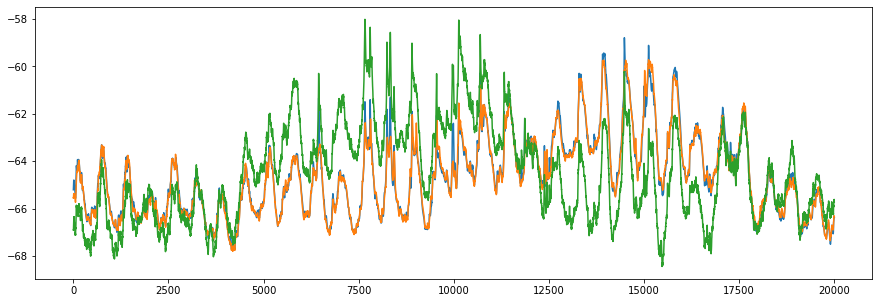

In [19]:
plt.figure(figsize = (15,5))
plt.plot(true[:50000][10000:30000])
plt.plot(one[:50000][10000:30000])
plt.plot(two[:50000][10000:30000])